In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import PowerTransformer



In [2]:
df=pd.read_csv("C:\\Users\\Dell\\Downloads\\datasets\\concrete_data.csv")
df.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [3]:
df.isnull().sum()

Cement                0
Blast Furnace Slag    0
Fly Ash               0
Water                 0
Superplasticizer      0
Coarse Aggregate      0
Fine Aggregate        0
Age                   0
Strength              0
dtype: int64

In [4]:
x=df.drop(columns=['Strength'])
y=df['Strength']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

Applying Regression without any transformation 

In [5]:
lr=LinearRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)
r2_score(y_test,y_pred)

0.6275531792314848

cross checking with cross val score 

In [6]:
np.mean(cross_val_score(lr,x,y,scoring='r2'))

np.float64(0.4609940491662864)

Graphs before applying transformation

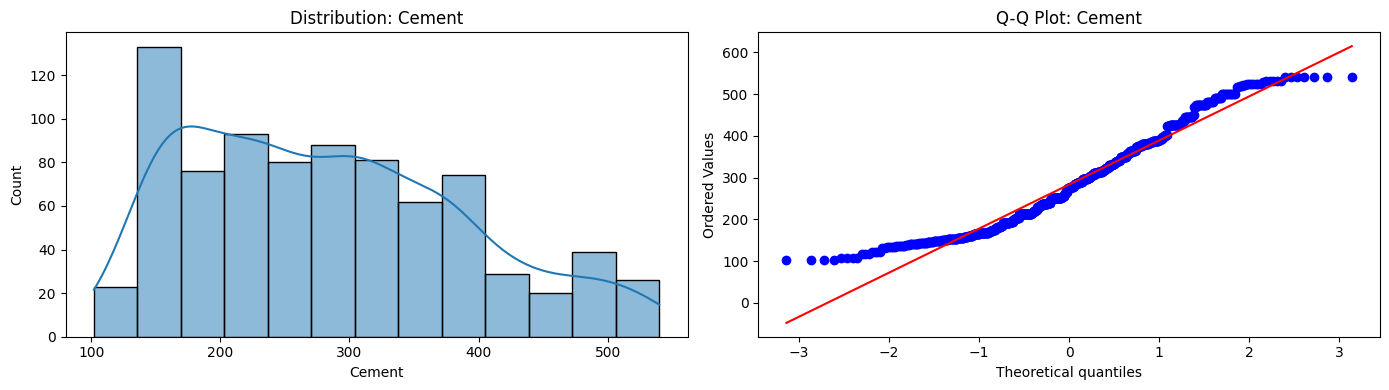

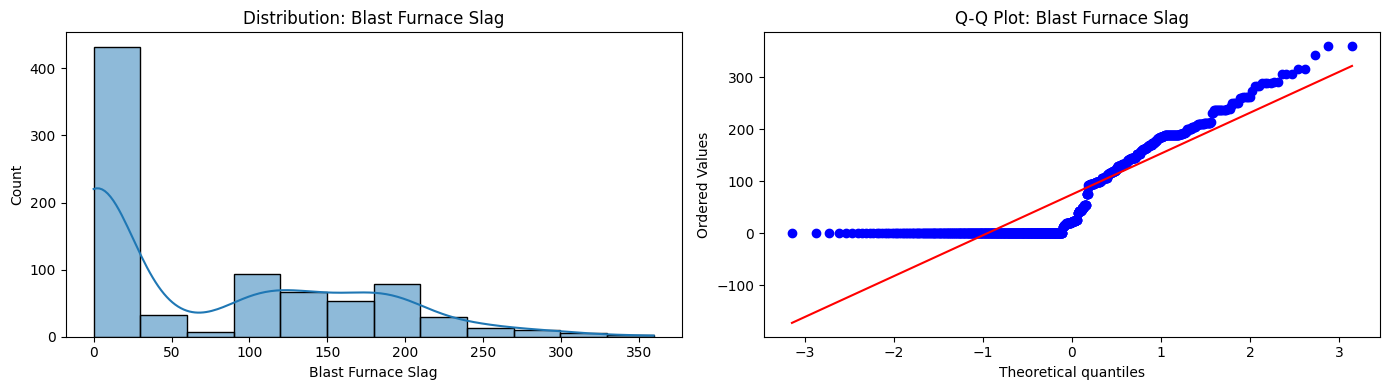

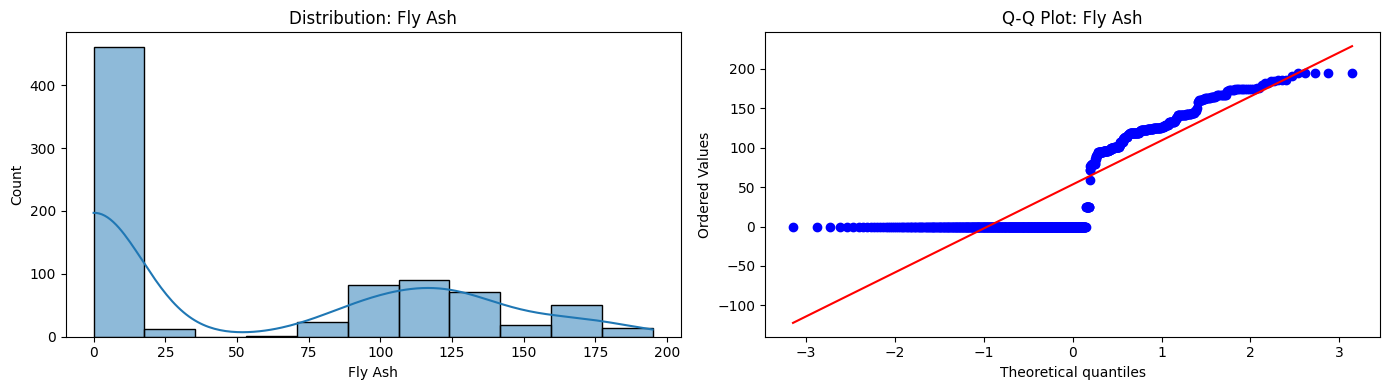

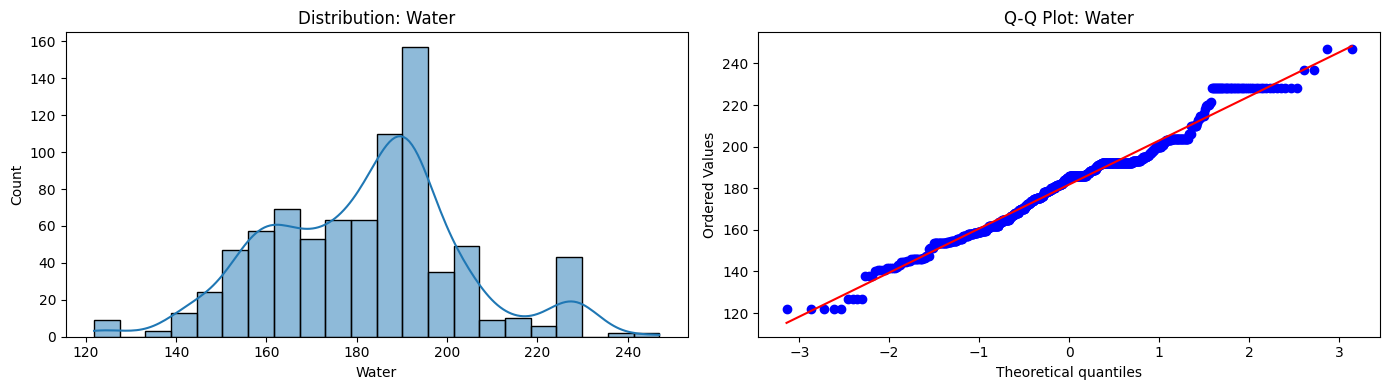

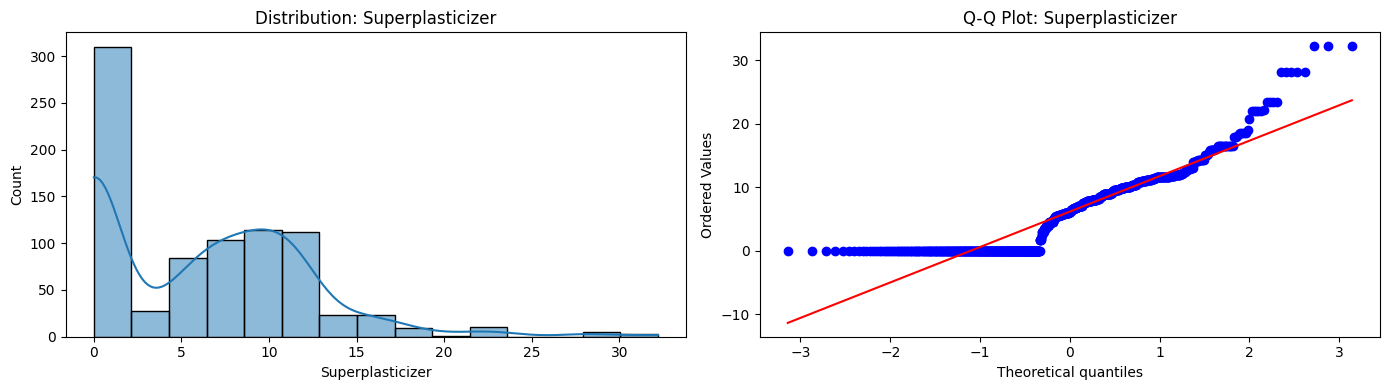

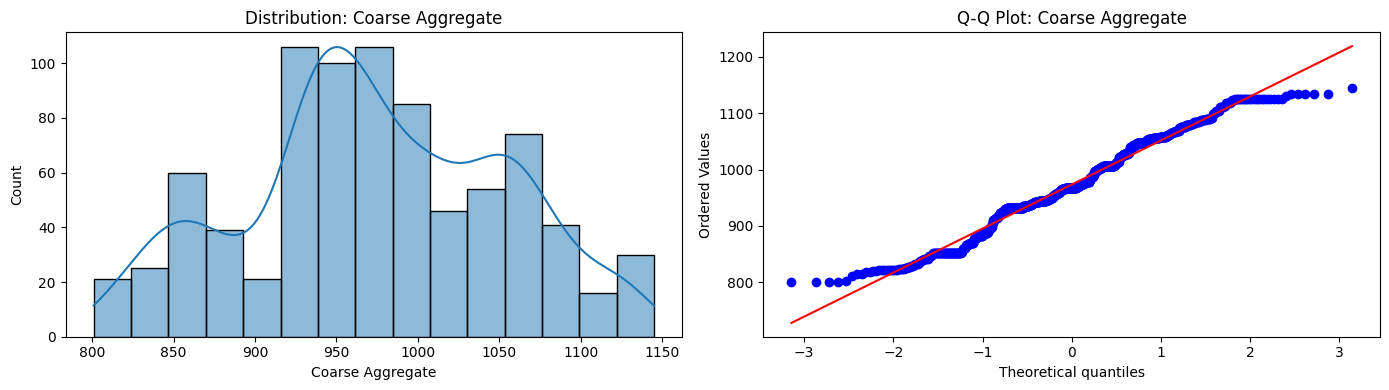

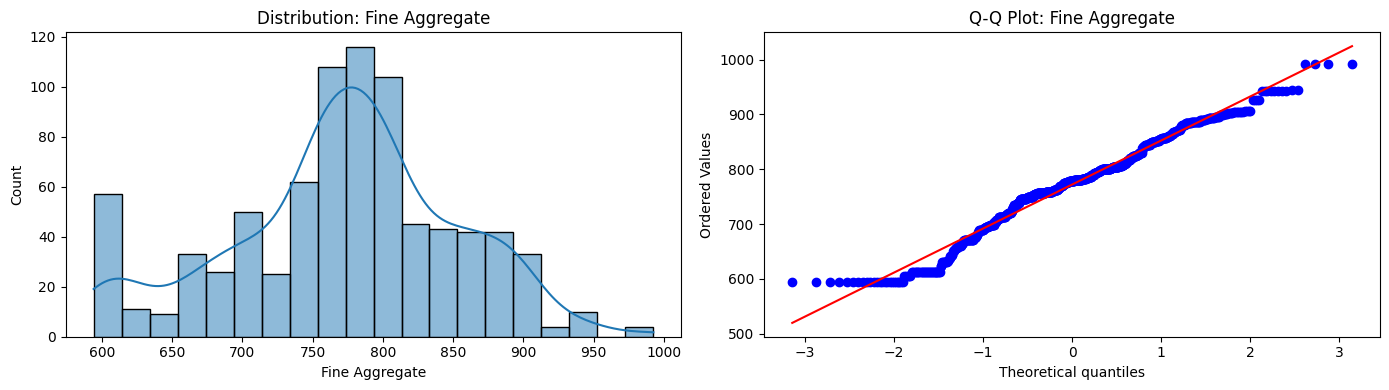

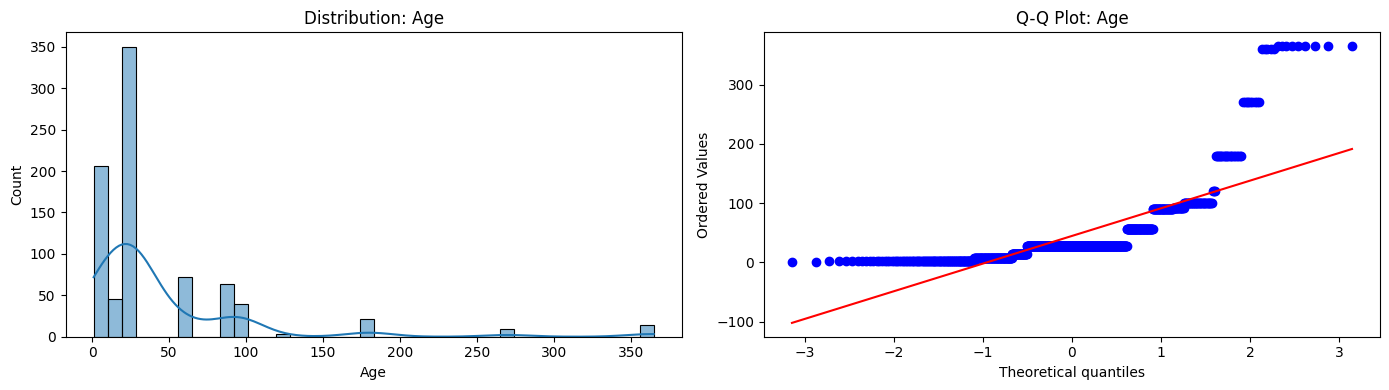

In [7]:
for col in x_train.columns:
    fig, axes = plt.subplots(1, 2, figsize=(14, 4))

    sns.histplot(x_train[col], kde=True, ax=axes[0]) #Left: Distribution plot
    axes[0].set_title(f"Distribution: {col}")
    
    stats.probplot(x_train[col], dist="norm", plot=axes[1]) # Right: Q-Q plot
    axes[1].set_title(f"Q-Q Plot: {col}")

    plt.tight_layout()
    plt.show()

Applying Box-Cox Transformation

In [9]:
pt=PowerTransformer(method='box-cox')
x_train_transformed=pt.fit_transform(x_train+0.000001)
x_test_transformed=pt.transform(x_test+0.000001)
pd.DataFrame({'cols':x_train.columns,'box_cox_lambdas':pt.lambdas_})

,cols,box_cox_lambdas
0,Cement,0.177025
1,Blast Furnace Slag,0.025093
2,Fly Ash,-0.038970
3,Water,0.772682
4,Superplasticizer,0.098811
5,Coarse Aggregate,1.129813
6,Fine Aggregate,1.782018
7,Age,0.066631


Applying Linear Regression on transformed data

In [12]:
lr=LinearRegression()
lr.fit(x_train_transformed,y_train)
y_pred2=lr.predict(x_test_transformed)
r2_score(y_test,y_pred2)

0.8047825008078886